데이터 정보 : https://www.kaggle.com/datasets/jpacse/datasets-for-churn-telecom

| 변수명                       | 변수 설명                                   | 변수 유형   |
|------------------------------|--------------------------------------------|--------------|
| CustomerID                   | 고객번호                                    | numerical    |
| RoamingCalls                 | 로밍 전화 수                               | numerical    |
| ThreewayCalls                | 3방향 전화 건 수                           | numerical    |
| Churn                        | 이탈 여부                                  | categorical  |
| PercChangeMinutes            | 변경률(분)                                 | numerical    |
| ReceivedCalls                | 수신받은 전화 건 수                        | numerical    |
| MonthlyRevenue               | 월 매출액                                  | numerical    |
| PercChangeRevenues           | 변경당 매출액                               | numerical    |
| OutboundCalls                | 발신 전화 수                               | numerical    |
| MonthlyMinutes               | 월 사용시간                                | numerical    |
| DroppedCalls                 | 끊어진 통화 수                             | numerical    |
| InboundCalls                 | 수신 전화 수                               | numerical    |
| TotalRecurringCharge         | 월별 총 지불 요금                         | numerical    |
| BlockedCalls                 | 차단된 통화 수                             | numerical    |
| PeakCallsInOut               | 피크 시간의 발신 및 수신 전화 수         | numerical    |
| DirectorAssistedCalls        | 디렉터 지원 통화                           | numerical    |
| UnansweredCalls              | 무응답 통화 수                             | numerical    |
| OffPeakCallsInOut            | 오프피크 시간의 발신 및 수신 전화 수     | numerical    |
| OverageMinutes               | 사용 시간 초과 분                         | numerical    |
| CustomerCareCalls            | 고객 관리 통화 수                         | numerical    |
| DroppedBlockedCalls          | 끊어진 또는 차단된 통화 수                 | numerical    |
| CallForwardingCalls          | 통화 전달 건 수                           | numerical    |
| HandsetModels                | 핸드셋 모델                               | numerical    |
| TruckOwner                   | 트럭 소유 여부                            | categorical  |
| CallWaitingCalls             | 통화 대기 건 수                           | numerical    |
| CurrentEquipmentDays         | 현재 장비 사용 일수                       | numerical    |
| RVOwner                      | RV(Recreational Vehicle) 소유 여부         | categorical  |
| MonthsInService              | 월 서비스 총 시간                         | numerical    |
| AgeHH1                       | 가구주 연령                               | numerical    |
| Homeownership                | 주택 소유 여부                            | categorical  |
| UniqueSubs                   | 고유 가입자 수                            | numerical    |
| AgeHH2                       | 다른 가구원의 연령                       | numerical    |
| BuysViaMailOrder             | 메일 주문을 통한 구매 여부                | categorical  |
| ActiveSubs                   | 활성 가입자 수                            | numerical    |
| ChildrenInHH                 | 가구 내 아동 여부                         | categorical  |
| RespondsToMailOffers         | 메일 응답 여부                            | categorical  |
| ServiceArea                  | 서비스 지역                               | categorical  |
| HandsetRefurbished           | 재생된 핸드셋 여부                        | categorical  |
| OptOutMailings               | 메일 수신 거부 여부                       | categorical  |
| Handsets                     | 핸드셋 수                                 | numerical    |
| HandsetWebCapable            | 핸드셋 웹 사용 가능 여부                  | categorical  |
| NonUSTravel                  | 미국 외 여행 여부                        | categorical  |
| OwnsComputer                 | 컴퓨터 보유 여부                          | categorical  |
| IncomeGroup                  | 소득 그룹                                 | numerical    |
| Occupation                   | 직종                                       | categorical  |
| HasCreditCard                | 신용카드 보유 여부                        | categorical  |
| OwnsMotorcycle               | 오토바이 소유 여부                        | categorical  |
| MaritalStatus                | 배우자 여부                               | categorical  |
| RetentionCalls               | 연관 상품 추천 통화 건 수                | numerical    |
| AdjustmentsToCreditRating    | 신용등급 조정                             | numerical    |
| RetentionOffersAccepted      | 연관 상품 추천 수락 여부                  | numerical    |
| HandsetPrice                 | 핸드셋 가격                               | numerical    |
| NewCellphoneUser             | 새로운 휴대폰 사용 여부                    | categorical  |
| MadeCallToRetentionTeam      | 연관 상품 추천 팀에 전화를 건 경우        | categorical  |
| NotNewCellphoneUser          | 기존 휴대폰 사용 여부                      | categorical  |
| CreditRating                 | 신용 등급                                 | categorical 

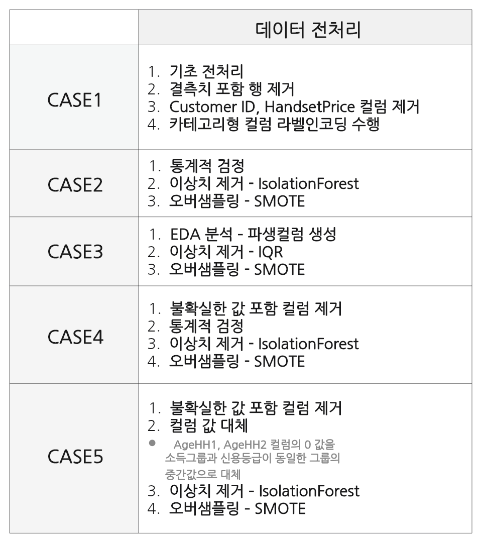

  ## 데이터 전처리 

In [1]:
!pip install plotly

In [47]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns 
# import koreanize_matplotlib # 한글설정 라이브러리 
import plotly.express as px
import shap

%matplotlib inline 

# mac 사용자
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='Arial Unicode MS')

In [2]:
train = pd.read_csv('./data/cell2celltrain.csv')
test = pd.read_csv('./data/cell2cellholdout.csv')
train.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 51047 non-null  int64  
 1   Churn                      51047 non-null  object 
 2   MonthlyRevenue             50891 non-null  float64
 3   MonthlyMinutes             50891 non-null  float64
 4   TotalRecurringCharge       50891 non-null  float64
 5   DirectorAssistedCalls      50891 non-null  float64
 6   OverageMinutes             50891 non-null  float64
 7   RoamingCalls               50891 non-null  float64
 8   PercChangeMinutes          50680 non-null  float64
 9   PercChangeRevenues         50680 non-null  float64
 10  DroppedCalls               51047 non-null  float64
 11  BlockedCalls               51047 non-null  float64
 12  UnansweredCalls            51047 non-null  float64
 13  CustomerCareCalls          51047 non-null  flo

#### 결측치 처리 

In [4]:
data1 = train.copy()
data1.isnull().sum().sort_values(ascending=False)

AgeHH2                       909
AgeHH1                       909
PercChangeMinutes            367
PercChangeRevenues           367
MonthlyRevenue               156
MonthlyMinutes               156
TotalRecurringCharge         156
DirectorAssistedCalls        156
OverageMinutes               156
RoamingCalls                 156
ServiceArea                   24
CurrentEquipmentDays           1
Handsets                       1
HandsetModels                  1
OwnsComputer                   0
NonUSTravel                    0
BuysViaMailOrder               0
OptOutMailings                 0
RespondsToMailOffers           0
RetentionCalls                 0
HasCreditCard                  0
IncomeGroup                    0
RetentionOffersAccepted        0
NewCellphoneUser               0
NotNewCellphoneUser            0
ReferralsMadeBySubscriber      0
RVOwner                        0
OwnsMotorcycle                 0
AdjustmentsToCreditRating      0
HandsetPrice                   0
MadeCallTo

In [5]:
data1.dropna(inplace=True)
data1.reset_index(drop=True, inplace=True)
data1.isnull().sum().sort_values(ascending=False)

CustomerID                   0
HasCreditCard                0
AgeHH2                       0
ChildrenInHH                 0
HandsetRefurbished           0
HandsetWebCapable            0
TruckOwner                   0
RVOwner                      0
Homeownership                0
BuysViaMailOrder             0
RespondsToMailOffers         0
OptOutMailings               0
NonUSTravel                  0
OwnsComputer                 0
RetentionCalls               0
Churn                        0
RetentionOffersAccepted      0
NewCellphoneUser             0
NotNewCellphoneUser          0
ReferralsMadeBySubscriber    0
IncomeGroup                  0
OwnsMotorcycle               0
AdjustmentsToCreditRating    0
HandsetPrice                 0
MadeCallToRetentionTeam      0
CreditRating                 0
PrizmCode                    0
Occupation                   0
AgeHH1                       0
CurrentEquipmentDays         0
HandsetModels                0
Handsets                     0
MonthlyR

#### 라벨인코딩 
범주형 컬럼 중 CreditRating 제외 모든 컬럼 드랍 후 라벨인코딩

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
data1.drop(columns=['CustomerID', 'HandsetPrice'], inplace=True, axis=1) 
le = LabelEncoder()
object_cols = data1.select_dtypes(include=['object']).columns
data1[object_cols] = data1[object_cols].apply(le.fit_transform)
data1[object_cols].head()

,Churn,ServiceArea,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,...,OwnsComputer,HasCreditCard,NewCellphoneUser,NotNewCellphoneUser,OwnsMotorcycle,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,1,655,0,0,1,0,0,0,1,1,...,1,1,0,0,0,1,0,2,4,0
1,1,607,1,0,0,0,0,0,1,1,...,1,1,1,0,0,0,3,2,4,2
2,0,349,1,0,0,0,0,1,0,0,...,0,1,1,0,0,0,2,3,1,2
3,0,607,0,0,1,0,0,0,1,1,...,0,1,1,0,0,0,3,0,3,0
4,1,560,0,0,0,0,0,0,1,1,...,1,1,0,1,0,0,0,0,4,2


 Case3 전 데이터 전처리 저장 

In [8]:
data1.to_csv('data1.csv', index=False)

---

### Case3  (상민)

#### 전처리
- 결측치 제거
- 불필요 컬럼 삭제 (ServiceArea, CustomerID)
- Unknown 많은 컬럼 삭제
- Age 컬럼 조정
- 이상치 제거
- RobustScaler 적용

In [9]:
data2 = train.copy()
data2

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51042,3399958,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,6,No,0,60,No,1-Highest,Suburban,Other,Yes
51043,3399974,No,95.17,1745.0,85.0,0.99,45.0,4.7,122.0,15.9,...,0,9,No,1,60,No,3-Good,Other,Other,No
51044,3399978,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,7,No,1,80,No,5-Low,Other,Clerical,No
51045,3399990,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,9,No,0,30,No,5-Low,Other,Other,No


#### 결측치 제거

In [10]:
data2.dropna(inplace=True)
data2.reset_index(drop=True, inplace=True)
data2.isnull().sum().sort_values(ascending=False)

CustomerID                   0
HasCreditCard                0
AgeHH2                       0
ChildrenInHH                 0
HandsetRefurbished           0
HandsetWebCapable            0
TruckOwner                   0
RVOwner                      0
Homeownership                0
BuysViaMailOrder             0
RespondsToMailOffers         0
OptOutMailings               0
NonUSTravel                  0
OwnsComputer                 0
RetentionCalls               0
Churn                        0
RetentionOffersAccepted      0
NewCellphoneUser             0
NotNewCellphoneUser          0
ReferralsMadeBySubscriber    0
IncomeGroup                  0
OwnsMotorcycle               0
AdjustmentsToCreditRating    0
HandsetPrice                 0
MadeCallToRetentionTeam      0
CreditRating                 0
PrizmCode                    0
Occupation                   0
AgeHH1                       0
CurrentEquipmentDays         0
HandsetModels                0
Handsets                     0
MonthlyR

#### Unknown 값이 50% 이상인 컬럼과  ServiceArea 제거 

In [11]:
drop_cols = ['MaritalStatus', 'HandsetPrice', 'Homeownership', 'ServiceArea' , 'CustomerID']
data2.drop(drop_cols, inplace=True, axis=1)
data2

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation
0,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,...,No,No,0,4,No,0,Yes,1-Highest,Suburban,Professional
1,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,...,Yes,No,0,5,No,0,No,4-Medium,Suburban,Professional
2,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,...,Yes,No,0,6,No,0,No,3-Good,Town,Crafts
3,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,...,Yes,No,0,6,No,0,No,4-Medium,Other,Other
4,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,...,No,Yes,0,9,No,1,No,1-Highest,Other,Professional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49747,No,0.00,76.0,30.0,0.00,0.0,0.0,0.0,0.0,5.7,...,No,No,0,4,No,0,No,2-High,Other,Professional
49748,No,31.92,63.0,17.0,0.00,43.0,0.0,-38.0,-13.2,0.7,...,No,No,0,3,No,0,No,3-Good,Other,Other
49749,No,71.99,724.0,70.0,0.00,4.0,0.9,-40.0,-2.0,14.3,...,No,No,0,7,No,0,No,1-Highest,Other,Professional
49750,Yes,117.49,384.0,30.0,0.00,250.0,0.0,0.0,0.0,4.0,...,No,No,0,2,No,0,No,5-Low,Other,Professional


#### AgeHH1, AgeHH2의 0값은 소득 그룹과, 신용등급이 동일한 그룹의 중간값으로 대치해준다

In [12]:
cond1 = (data2[['AgeHH1']]!=0).values
cond2 = (data2[['AgeHH2']]!=0).values
data_not_zero =  data2[cond1&cond2]
grouped_median = data_not_zero.groupby(['IncomeGroup', 'CreditRating'])[['AgeHH1', 'AgeHH2']].agg('median')
grouped_median

AgeHH1  AgeHH2
IncomeGroup CreditRating                
0           1-Highest       43.0    44.0
            2-High          40.0    38.0
            3-Good          40.0    43.0
            4-Medium        44.0    40.0
            5-Low           40.0    34.0
...                          ...     ...
9           3-Good          50.0    48.0
            4-Medium        50.0    48.0
            5-Low           48.0    46.0
            6-VeryLow       47.0    45.0
            7-Lowest        48.0    46.0

[70 rows x 2 columns]

In [13]:
for index, row in data2.iterrows():
    if row['AgeHH1'] == 0:
        median_value = grouped_median.loc[(row['IncomeGroup'], row['CreditRating']), 'AgeHH1']
        data2.at[index, 'AgeHH1'] = median_value
    
    if row['AgeHH2'] == 0:
        median_value = grouped_median.loc[(row['IncomeGroup'], row['CreditRating']), 'AgeHH2']
        data2.at[index, 'AgeHH2'] = median_value

In [14]:
def draw_px_histogram(df, x):
    fig = px.histogram(df, x=x)
    fig.update_layout(
    width=1500,  
    height=500, 
    )
    fig.show()

In [15]:
draw_px_histogram(data2, 'AgeHH1')

#### 라벨인코딩

In [16]:
le = LabelEncoder()
object_cols = data2.select_dtypes(include=['object']).columns
data2[object_cols] = data2[object_cols].apply(le.fit_transform)
data2[object_cols]

,Churn,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,NewCellphoneUser,NotNewCellphoneUser,OwnsMotorcycle,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation
0,1,0,0,1,0,0,1,1,0,0,1,1,0,0,0,1,0,2,4
1,1,1,0,0,0,0,1,1,0,0,1,1,1,0,0,0,3,2,4
2,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,2,3,1
3,0,0,0,1,0,0,1,1,0,0,0,1,1,0,0,0,3,0,3
4,1,0,0,0,0,0,1,1,0,0,1,1,0,1,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49747,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,4
49748,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,2,0,3
49749,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,4
49750,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,4,0,4


#### 이상치 제거 

In [17]:
data2.describe()

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation
count,49752.000000,49752.000000,49752.000000,49752.000000,49752.000000,49752.000000,49752.000000,49752.000000,49752.000000,49752.000000,...,49752.000000,49752.000000,49752.000000,49752.000000,49752.000000,49752.000000,49752.000000,49752.000000,49752.000000,49752.000000
mean,0.286320,58.717374,525.021466,46.834961,0.891841,39.754040,1.226327,-11.656175,-1.175937,6.010556,...,0.193178,0.138185,0.051475,4.402677,0.013547,0.053686,0.032582,1.864528,1.145059,3.163792
std,0.452045,44.317244,528.510155,23.759492,2.224725,96.091606,9.848360,255.858193,39.392124,9.036653,...,0.394796,0.345098,0.266490,3.110498,0.115602,0.382677,0.177541,1.568627,1.175946,0.886815
min,0.000000,-6.170000,0.000000,-6.000000,0.000000,0.000000,0.000000,-3875.000000,-1107.700000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,33.610000,158.000000,30.000000,0.000000,0.000000,0.000000,-83.000000,-7.000000,0.700000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,0.000000,48.380000,366.000000,45.000000,0.250000,3.000000,0.000000,-5.000000,-0.300000,3.000000,...,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,1.000000,1.000000,3.000000
75%,1.000000,70.910000,722.000000,60.000000,0.990000,40.000000,0.300000,65.000000,1.600000,7.700000,...,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,3.000000,2.000000,3.000000
max,1.000000,1223.380000,7359.000000,400.000000,159.390000,4321.000000,1112.400000,5192.000000,2483.500000,221.700000,...,1.000000,1.000000,16.000000,9.000000,1.000000,25.000000,1.000000,6.000000,3.000000,7.000000


In [18]:
from sklearn.ensemble import IsolationForest
import collections

# n_estimators : 노드 수 (50 - 100사이의 숫자면 적당하다.)
# max_samples : 샘플링 수
# contamination : 이상치 비율
# max_features : 사용하고자 하는 독립변수 수 (1이면 전부 사용)
# random_state : seed를 일정하게 유지시켜줌(if None, the random number generator is the RandomState instance used by np.random)
# n_jobs : CPU 병렬처리 유뮤(1이면 안하는 것으로 디버깅에 유리. -1을 넣으면 multilple CPU를 사용하게 되어 메모리 사용량이 급격히 늘어날 수 있다.)

clf_ss = IsolationForest(n_estimators=100,
                      max_samples="auto", 
                      contamination=0.01,
                      max_features=1,
                      bootstrap=False,
                      n_jobs=1,
                      random_state=None,
                      verbose=0)

# fit 함수를 이용하여, 데이터셋을 학습시킨다.
clf_ss.fit(data2)

# predict 함수를 이용하여, outlier를 판별해 준다. 0과 1로 이루어진 Series형태의 데이터가 나온다.
y_pred_outliers = clf_ss.predict(data2)

# 이상치의 개수를 Count하는 과정
collections.Counter(y_pred_outliers)

# 원래의 DataFrame에 붙히기. out행의 값이 -1인 것을 제거하면 이상치가 제거된 DataFrame을 얻을 수 있다.
data2['out']=y_pred_outliers
outliers=data2.loc[data2['out']== -1]
outlier_index=list(outliers.index)

c:\Users\User\anaconda3\envs\develop_env\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names



findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Fo

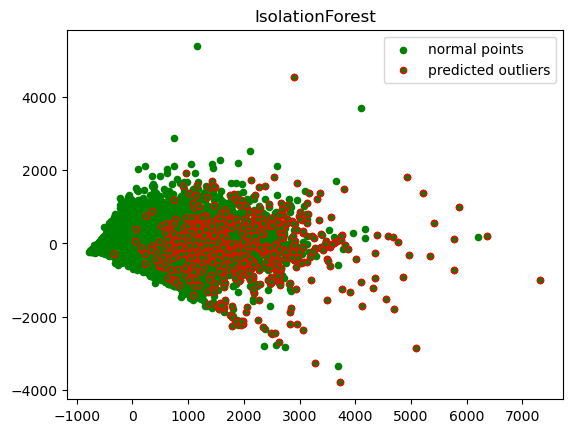

In [19]:
from sklearn.decomposition import PCA

pca = PCA(2)
pca.fit(data2)
res=pd.DataFrame(pca.transform(data2))
Z = np.array(res)
plt.title("IsolationForest")
b1 = plt.scatter(res[0], res[1], c='green',
                 s=20,label="normal points")
b1 =plt.scatter(res.iloc[outlier_index,0],res.iloc[outlier_index,1], c='green',s=20,  edgecolor="red",label="predicted outliers")
plt.legend(loc="upper right")
plt.show()

In [20]:
train_rm_out = data2[data2['out'] != -1]
train_rm_out['Churn'] = data2["Churn"]
train_rm_out.describe()

C:\Users\User\AppData\Local\Temp\ipykernel_18104\813980142.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,out
count,49254.000000,49254.000000,49254.000000,49254.000000,49254.000000,49254.000000,49254.000000,49254.000000,49254.000000,49254.000000,...,49254.000000,49254.000000,49254.000000,49254.000000,49254.000000,49254.000000,49254.000000,49254.000000,49254.000000,49254.0
mean,0.286149,57.294404,506.243371,46.303123,0.830681,36.915520,1.130517,-9.851545,-1.021338,5.760694,...,0.137004,0.050737,4.405206,0.013156,0.050250,0.031490,1.857616,1.146912,3.163459,1.0
std,0.451965,40.474224,486.687340,22.760952,1.823373,83.146225,8.659060,240.575361,37.408916,8.430479,...,0.343855,0.265054,3.110206,0.113945,0.354414,0.174639,1.564343,1.175993,0.885743,0.0
min,0.000000,-6.170000,0.000000,-6.000000,0.000000,0.000000,0.000000,-3406.000000,-1107.700000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,0.000000,33.500000,157.000000,30.000000,0.000000,0.000000,0.000000,-82.000000,-6.800000,0.700000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,1.0
50%,0.000000,47.895000,361.500000,45.000000,0.250000,2.000000,0.000000,-5.000000,-0.300000,3.000000,...,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,1.000000,1.000000,3.000000,1.0
75%,1.000000,69.860000,704.000000,60.000000,0.740000,39.000000,0.200000,64.000000,1.600000,7.300000,...,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,3.000000,2.000000,3.000000,1.0
max,1.000000,1223.380000,6104.000000,400.000000,43.560000,2560.000000,1112.400000,5192.000000,2483.500000,221.700000,...,1.000000,16.000000,9.000000,1.000000,21.000000,1.000000,6.000000,3.000000,7.000000,1.0


#### RobustScaler

In [21]:
from sklearn.preprocessing import RobustScaler
import pandas as pd

def scale_data_with_robust_scaler(data):
    rs = RobustScaler()
    scaled_data = pd.DataFrame(rs.fit_transform(data), columns=data.columns)
    return scaled_data

In [22]:
train_rs = scale_data_with_robust_scaler(train_rm_out)
train_rs.head()

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,out
0,1.0,-0.657178,-0.260512,-0.766667,0.000000,-0.051282,0.0,-1.041096,-2.226190,-0.348485,...,0.0,0.0,-0.166667,0.0,0.0,1.0,-0.5,0.5,1.0,0.0
1,1.0,-0.849972,-0.642596,-0.933333,-0.337838,-0.051282,0.0,0.006849,0.035714,-0.409091,...,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.5,1.0,0.0
2,0.0,-0.272140,-0.646252,-0.233333,-0.337838,-0.051282,0.0,0.020548,0.035714,-0.454545,...,0.0,0.0,0.166667,0.0,0.0,0.0,0.5,1.0,-2.0,0.0
3,0.0,0.945682,1.737660,1.000000,1.337838,-0.051282,0.0,1.109589,1.000000,7.424242,...,0.0,0.0,0.166667,0.0,0.0,0.0,1.0,-0.5,0.0,0.0
4,1.0,-0.845847,-0.660878,-0.933333,-0.337838,-0.051282,0.0,0.034247,0.011905,-0.454545,...,1.0,0.0,0.666667,0.0,1.0,0.0,-0.5,-0.5,1.0,0.0


#### 오버샘플링

In [23]:
!pip install -U imbalanced-learn




In [24]:
from imblearn.over_sampling import SMOTE

In [25]:
# Separate features (X) and target variable (y)
X = train_rs.drop('Churn', axis=1)
y = train_rs['Churn']

# Apply SMOTE to balance the target variable
smote = SMOTE(random_state=70)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a new DataFrame with the balanced data
train_rs_ov = pd.concat([X_resampled, y_resampled], axis=1)

findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.


findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Fo

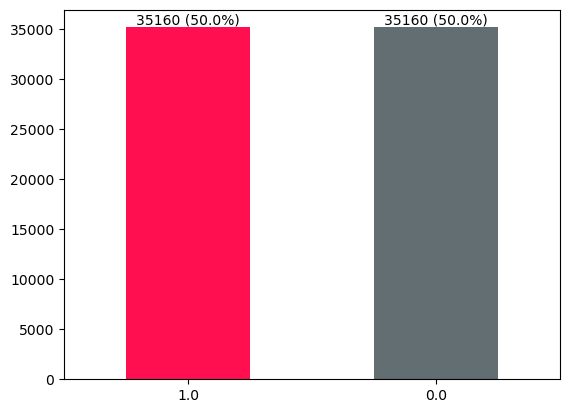

In [26]:
import matplotlib.pyplot as plt
value_counts = train_rs_ov['Churn'].value_counts()

# 막대 그래프 그리기
ax = value_counts.plot(kind='bar', color=['#ff0f4f','#626e72'])
# 각 값의 카운트를 막대 위에 표시
def autolabel_percent(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2, height,
                f'{height} ({height / value_counts.sum() * 100:.1f}%)',
                ha='center', va='bottom')

autolabel_percent(ax.patches)

plt.xticks(rotation=360)
# 그래프 출력
plt.show()

#### Case3 모델 학습

In [27]:
from sklearn.model_selection import train_test_split

def split_train_test_data(data, target_variable, test_size=0.3, random_state=70):
    
    y = data[target_variable]
    X = data.drop(columns=[target_variable])

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    print('X train shape: ', X_train.shape)
    print('Y train shape: ', y_train.shape)
    print('X test shape: ', X_test.shape)
    print('Y test shape: ', y_test.shape)

    return X_train, X_test, y_train, y_test

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import (AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier)
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import classification_report

In [29]:
# 모델학습 후 5가지 정보 확인하는 코드
def report(y_test, pred):

    accuracy = accuracy_score(y_test, pred)
    print("Accuracy:", accuracy)

    precision = precision_score(y_test, pred)
    print("Precision:", precision)

    recall = recall_score(y_test, pred)
    print("Recall:", recall)

    f1 = f1_score(y_test, pred)
    print("F1 Score:", f1)

    tn = ((y_test == 0) & (pred == 0)).sum()
    fp = ((y_test == 0) & (pred == 1)).sum()
    specificity = tn / (tn + fp)
    print("Specificity:", specificity)

In [30]:
# validation 함수

def perform_cross_validation(X, y, models):
    results = []
    names = []

    for name, model in models:
        kfold = KFold(n_splits=5, random_state=70, shuffle=True)
        cv_results = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
        results.append(cv_results)
        names.append(name)

        print(name, cv_results.mean(), cv_results.std())

models = [
    ('RandomForestClassifier', RandomForestClassifier()),
    ('DecisionTreeClassifier', DecisionTreeClassifier()),
    ('AdaBoostClassifier', AdaBoostClassifier()),
    ('GradientBoostingClassifier', GradientBoostingClassifier()),
    ('LogisticRegression', LogisticRegression())
]

In [31]:
# 모델별 정보 DataFrame에 담는 함수 for. RobustScaler 
def evaluate_models_rs(models, X_train, y_train, X_test, y_test, df):

    for name, model in models:
        kfold = KFold(n_splits=5, random_state=70, shuffle=True)

        model.fit(X_train, y_train)
        pred = model.predict(X_test)

        print(name)
        print(classification_report(y_test, pred, target_names=['No', 'Yes']))

        accuracy = accuracy_score(y_test, pred)
        precision = precision_score(y_test, pred, pos_label=1.0)
        recall = recall_score(y_test, pred, pos_label=1.0)
        f1 = f1_score(y_test, pred, pos_label=1.0)

        model_results = pd.DataFrame({'Model': [name],
                                      'Accuracy': [accuracy],
                                      'Precision': [precision],
                                      'Recall': [recall],
                                      'F1-Score': [f1]})

        df = pd.concat([df, model_results], ignore_index=True)

    return df

models = [
    ('RandomForestClassifier', RandomForestClassifier()),
    ('DecisionTreeClassifier', DecisionTreeClassifier()),
    ('AdaBoostClassifier', AdaBoostClassifier()),
    ('GradientBoostingClassifier', GradientBoostingClassifier()),
    ('LogisticRegression', LogisticRegression())
]

In [32]:
X_train, X_test, y_train, y_test = split_train_test_data(train_rs_ov, 'Churn')

X train shape:  (49224, 53)
Y train shape:  (49224,)
X test shape:  (21096, 53)
Y test shape:  (21096,)


In [33]:
perform_cross_validation(X_train, y_train, models)

RandomForestClassifier 0.8101535874316845 0.005468679490877768
DecisionTreeClassifier 0.7022387786802715 0.0036644456280155824
AdaBoostClassifier 0.7406957000513239 0.002680112769734331
GradientBoostingClassifier 0.7956078707986799 0.0034742186864133847


c:\Users\User\anaconda3\envs\develop_env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

c:\Users\User\anaconda3\envs\develop_env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

c:\Users\U

LogisticRegression 0.59154070952259 0.0045691746304959415


c:\Users\User\anaconda3\envs\develop_env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [34]:
train_rs_ov_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])
train_rs_ov_df = evaluate_models_rs(models, X_train, y_train, X_test, y_test,train_rs_ov_df)
train_rs_ov_df

RandomForestClassifier
              precision    recall  f1-score   support

          No       0.75      0.94      0.83     10526
         Yes       0.91      0.69      0.79     10570

    accuracy                           0.81     21096
   macro avg       0.83      0.81      0.81     21096
weighted avg       0.83      0.81      0.81     21096

DecisionTreeClassifier
              precision    recall  f1-score   support

          No       0.71      0.71      0.71     10526
         Yes       0.71      0.71      0.71     10570

    accuracy                           0.71     21096
   macro avg       0.71      0.71      0.71     21096
weighted avg       0.71      0.71      0.71     21096

AdaBoostClassifier
              precision    recall  f1-score   support

          No       0.71      0.80      0.75     10526
         Yes       0.77      0.67      0.72     10570

    accuracy                           0.74     21096
   macro avg       0.74      0.74      0.74     21096
weighted 

c:\Users\User\anaconda3\envs\develop_env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



,Model,Accuracy,Precision,Recall,F1-Score
0,RandomForestClassifier,0.814325,0.914827,0.694040,0.789284
1,DecisionTreeClassifier,0.708665,0.708955,0.710028,0.709491
2,AdaBoostClassifier,0.736253,0.773492,0.669726,0.717879
3,GradientBoostingClassifier,0.791193,0.909200,0.647966,0.756670
4,LogisticRegression,0.590112,0.585764,0.621287,0.603003


---

### Case4  (상민)
- Permutation Importance 를 통해 중요 feature 선택 후 모델학습

#### Permutation importance 학습

In [36]:
#!pip install eli5

In [37]:
# Permutation Importance 돌리려고
# rf_clf=RandomForestClassifier(파리미터) 에서
# 파라미터를 어떻게 설정할 줄 몰라서 모델 돌리는 함수에서 rf_clf 에 저장하도록 시켰는데 맞는지 모르겠어요ㅠ

def evaluate_models_rs(models, X_train, y_train, X_test, y_test, df):

    rf_clf = None  # RandomForestClassifier 객체를 저장할 변수

    for name, model in models:
        kfold = KFold(n_splits=5, random_state=70, shuffle=True)

        model.fit(X_train, y_train)
        pred = model.predict(X_test)

        if name == 'RandomForestClassifier':
            rf_clf = model  # RandomForestClassifier 객체 저장

        print(name)
        print(classification_report(y_test, pred, target_names=['No', 'Yes']))

        accuracy = accuracy_score(y_test, pred)
        precision = precision_score(y_test, pred, pos_label=1.0)
        recall = recall_score(y_test, pred, pos_label=1.0)
        f1 = f1_score(y_test, pred, pos_label=1.0)

        model_results = pd.DataFrame({'Model': [name],
                                      'Accuracy': [accuracy],
                                      'Precision': [precision],
                                      'Recall': [recall],
                                      'F1-Score': [f1]})

        df = pd.concat([df, model_results], ignore_index=True)

    return df, rf_clf

models = [
    ('RandomForestClassifier', RandomForestClassifier()),
    ('DecisionTreeClassifier', DecisionTreeClassifier()),
    ('AdaBoostClassifier', AdaBoostClassifier()),
    ('GradientBoostingClassifier', GradientBoostingClassifier()),
    ('LogisticRegression', LogisticRegression())
]

df, rf_clf = evaluate_models_rs(models, X_train, y_train, X_test, y_test, train_rs_ov_df)

RandomForestClassifier
              precision    recall  f1-score   support

          No       0.76      0.92      0.83     10541
         Yes       0.90      0.70      0.79     10550

    accuracy                           0.81     21091
   macro avg       0.83      0.81      0.81     21091
weighted avg       0.83      0.81      0.81     21091

DecisionTreeClassifier
              precision    recall  f1-score   support

          No       0.72      0.70      0.71     10541
         Yes       0.71      0.73      0.72     10550

    accuracy                           0.71     21091
   macro avg       0.71      0.71      0.71     21091
weighted avg       0.71      0.71      0.71     21091

AdaBoostClassifier
              precision    recall  f1-score   support

          No       0.71      0.78      0.75     10541
         Yes       0.76      0.69      0.72     10550

    accuracy                           0.73     21091
   macro avg       0.74      0.73      0.73     21091
weighted 

c:\Users\User\anaconda3\envs\develop_env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [38]:
rf_clf

RandomForestClassifier()

In [39]:
# f1 스코어를 중점으로 랜덤포레스트에서 중요하게 작용한 상위 35feature들 확인
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(rf_clf,scoring = 'f1', random_state=70).fit(X_train, y_train)
eli5.show_weights(perm,top=35, feature_names=X_test.columns.tolist())

Weight,Feature
0.0190 ± 0.0010,MonthsInService
0.0182 ± 0.0006,CurrentEquipmentDays
0.0056 ± 0.0003,HandsetRefurbished
0.0049 ± 0.0009,CreditRating
0.0048 ± 0.0004,NewCellphoneUser
0.0043 ± 0.0003,TotalRecurringCharge
0.0041 ± 0.0004,HandsetModels
0.0034 ± 0.0003,PrizmCode
0.0032 ± 0.0001,UniqueSubs
0.0028 ± 0.0003,HasCreditCard


In [40]:
# 중요 특성 35가지 + Churn
perm_features_35 = ['MonthsInService', 'CurrentEquipmentDays', 'HandsetRefurbished', 'CreditRating', 'NewCellphoneUser',
                    'HandsetModels', 'PrizmCode', 'MonthlyMinutes', 'TotalRecurringCharge', 'OverageMinutes',
                    'PercChangeMinutes', 'UniqueSubs', 'HasCreditCard', 'IncomeGroup', 'Handsets',
                    'TruckOwner', 'DirectorAssistedCalls', 'PercChangeRevenues', 'NotNewCellphoneUser', 'AgeHH1',
                    'CustomerCareCalls', 'BlockedCalls', 'HandsetWebCapable', 'UnansweredCalls', 'MonthlyRevenue',
                    'OffPeakCallsInOut', 'AgeHH2', 'RoamingCalls', 'InboundCalls', 'DroppedCalls',
                    'PeakCallsInOut', 'ChildrenInHH', 'Occupation', 'OutboundCalls', 'ReceivedCalls', 'Churn']

In [41]:
train_rs_ov_pi = train_rs_ov[perm_features_35].copy()
train_rs_ov_pi

,MonthsInService,CurrentEquipmentDays,HandsetRefurbished,CreditRating,NewCellphoneUser,HandsetModels,PrizmCode,MonthlyMinutes,TotalRecurringCharge,OverageMinutes,...,AgeHH2,RoamingCalls,InboundCalls,DroppedCalls,PeakCallsInOut,ChildrenInHH,Occupation,OutboundCalls,ReceivedCalls,Churn
0,3.461538,0.093248,0.0,-0.500000,0.0,1.000000,0.500000,-0.259598,-0.766667,-0.051282,...,0.000000,0.000000,-0.222222,-0.348485,-0.031480,0.000000,1.000000,-0.447811,0.324094,1.0
1,3.230769,3.768489,0.0,1.000000,1.0,0.000000,0.500000,-0.641682,-0.933333,-0.051282,...,0.000000,0.000000,-0.222222,-0.409091,-0.587618,1.000000,1.000000,-0.447811,-0.366738,1.0
2,3.384615,4.758842,0.0,0.500000,1.0,0.000000,1.000000,-0.645338,-0.233333,-0.051282,...,-2.000000,0.000000,-0.222222,-0.454545,-0.626443,1.000000,-2.000000,-0.437710,-0.363895,0.0
3,3.307692,0.405145,0.0,1.000000,1.0,3.000000,-0.500000,1.738574,1.000000,-0.051282,...,0.000000,0.000000,16.111111,7.424242,5.190976,0.000000,0.000000,12.020202,1.056859,0.0
4,2.846154,1.672026,0.0,-0.500000,0.0,2.000000,-0.500000,-0.659963,-0.933333,-0.051282,...,1.500000,0.000000,-0.222222,-0.454545,-0.640084,0.000000,1.000000,-0.447811,-0.366738,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70297,-0.169913,0.226097,0.0,0.000000,0.0,0.000000,0.500000,-0.374712,-0.166667,-0.051282,...,-0.093348,0.000000,-0.222222,-0.058980,-0.308025,1.000000,0.208869,-0.439820,-0.297015,1.0
70298,0.001668,0.472481,0.0,0.602168,0.0,0.000000,0.204337,-0.274189,-1.030442,-0.030324,...,0.099458,0.795663,-0.215411,-0.445257,-0.569971,0.000000,0.000000,-0.383827,-0.348294,1.0
70299,-0.434831,-0.086542,0.0,0.000000,0.0,0.000000,0.169439,-0.638812,-1.166667,-0.051282,...,-2.332640,0.000000,-0.112035,-0.439520,-0.602970,1.000000,0.000000,-0.406630,-0.349117,1.0
70300,-0.123900,0.271028,0.0,0.194653,0.0,0.000000,0.305347,1.385815,0.847310,2.423775,...,0.000000,0.194653,-0.222222,-0.454545,-0.640084,0.389305,0.000000,-0.447811,-0.366738,1.0


In [42]:
# 재학습
X_train, X_test, y_train, y_test = split_train_test_data(train_rs_ov_pi, 'Churn')

X train shape:  (49211, 35)
Y train shape:  (49211,)
X test shape:  (21091, 35)
Y test shape:  (21091,)


In [43]:
perform_cross_validation(X_train, y_train, models)

RandomForestClassifier 0.8031336093720796 0.004925647995292004
DecisionTreeClassifier 0.7040907312887934 0.004957935453464944
AdaBoostClassifier 0.7391843819537558 0.0038385739917923974
GradientBoostingClassifier 0.7918149864475599 0.004257496986054286


c:\Users\User\anaconda3\envs\develop_env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

c:\Users\User\anaconda3\envs\develop_env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

c:\Users\U

LogisticRegression 0.5849913134277658 0.005527270170061613


c:\Users\User\anaconda3\envs\develop_env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [44]:
train_rs_ov_pi_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])
train_rs_ov_pi_df = evaluate_models_rs(models, X_train, y_train, X_test, y_test,train_rs_ov_pi_df)
train_rs_ov_pi_df

RandomForestClassifier
              precision    recall  f1-score   support

          No       0.76      0.92      0.83     10541
         Yes       0.90      0.70      0.79     10550

    accuracy                           0.81     21091
   macro avg       0.83      0.81      0.81     21091
weighted avg       0.83      0.81      0.81     21091

DecisionTreeClassifier
              precision    recall  f1-score   support

          No       0.72      0.70      0.71     10541
         Yes       0.71      0.73      0.72     10550

    accuracy                           0.72     21091
   macro avg       0.72      0.72      0.72     21091
weighted avg       0.72      0.72      0.72     21091

AdaBoostClassifier
              precision    recall  f1-score   support

          No       0.71      0.80      0.75     10541
         Yes       0.77      0.68      0.72     10550

    accuracy                           0.74     21091
   macro avg       0.74      0.74      0.74     21091
weighted 

c:\Users\User\anaconda3\envs\develop_env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



(                        Model  Accuracy  Precision    Recall  F1-Score
 0      RandomForestClassifier  0.812337   0.900876  0.702085  0.789154
 1      DecisionTreeClassifier  0.715044   0.710224  0.726919  0.718475
 2          AdaBoostClassifier  0.738704   0.769206  0.682370  0.723191
 3  GradientBoostingClassifier  0.794604   0.923916  0.642275  0.757772
 4          LogisticRegression  0.577640   0.572157  0.617062  0.593761,
 RandomForestClassifier())

In [45]:
# 중요 특성 25가지 + Churn
perm_features_25 = ['MonthsInService', 'CurrentEquipmentDays', 'HandsetRefurbished', 'CreditRating', 'NewCellphoneUser',
                    'HandsetModels', 'PrizmCode', 'MonthlyMinutes', 'TotalRecurringCharge', 'OverageMinutes',
                    'PercChangeMinutes', 'UniqueSubs', 'HasCreditCard', 'IncomeGroup', 'Handsets',
                    'TruckOwner', 'DirectorAssistedCalls', 'PercChangeRevenues', 'NotNewCellphoneUser', 'AgeHH1',
                    'CustomerCareCalls', 'BlockedCalls', 'HandsetWebCapable', 'UnansweredCalls', 'MonthlyRevenue', 'Churn']

In [46]:
train_rs_ov_pi_25 = train_rs_ov[perm_features_25].copy()
train_rs_ov_pi_25

,MonthsInService,CurrentEquipmentDays,HandsetRefurbished,CreditRating,NewCellphoneUser,HandsetModels,PrizmCode,MonthlyMinutes,TotalRecurringCharge,OverageMinutes,...,DirectorAssistedCalls,PercChangeRevenues,NotNewCellphoneUser,AgeHH1,CustomerCareCalls,BlockedCalls,HandsetWebCapable,UnansweredCalls,MonthlyRevenue,Churn
0,3.461538,0.093248,0.0,-0.500000,0.0,1.000000,0.500000,-0.259598,-0.766667,-0.051282,...,0.000000,-2.253012,0.0,2.000000,0.000000,-0.090909,0.0,-0.315961,-0.657086,1.0
1,3.230769,3.768489,0.0,1.000000,1.0,0.000000,0.500000,-0.641682,-0.933333,-0.051282,...,-0.337838,0.036145,0.0,-0.200000,0.000000,-0.303030,-1.0,-0.433225,-0.849893,1.0
2,3.384615,4.758842,0.0,0.500000,1.0,0.000000,1.000000,-0.645338,-0.233333,-0.051282,...,-0.337838,0.036145,0.0,-1.600000,0.000000,-0.303030,-1.0,-0.521173,-0.272021,0.0
3,3.307692,0.405145,0.0,1.000000,1.0,3.000000,-0.500000,1.738574,1.000000,-0.051282,...,1.337838,1.012048,0.0,-1.200000,2.529412,2.030303,0.0,1.954397,0.945885,0.0
4,2.846154,1.672026,0.0,-0.500000,0.0,2.000000,-0.500000,-0.659963,-0.933333,-0.051282,...,-0.337838,0.012048,1.0,0.400000,0.000000,-0.303030,-1.0,-0.521173,-0.845768,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70297,-0.169913,0.226097,0.0,0.000000,0.0,0.000000,0.500000,-0.374712,-0.166667,-0.051282,...,-0.337838,0.036145,0.0,0.083548,0.000000,-0.231109,0.0,-0.374285,-0.492333,1.0
70298,0.001668,0.472481,0.0,0.602168,0.0,0.000000,0.204337,-0.274189,-1.030442,-0.030324,...,3.944481,0.278114,0.0,-0.118265,0.000000,-0.303030,0.0,-0.501205,-0.819918,1.0
70299,-0.434831,-0.086542,0.0,0.000000,0.0,0.000000,0.169439,-0.638812,-1.166667,-0.051282,...,-0.337838,0.036145,0.0,0.400000,0.000000,-0.303030,0.0,-0.507175,-1.042151,1.0
70300,-0.123900,0.271028,0.0,0.194653,0.0,0.000000,0.305347,1.385815,0.847310,2.423775,...,3.529080,4.723355,0.0,-1.077861,0.000000,-0.303030,0.0,-0.521173,1.422475,1.0


In [47]:
# 재학습
X_train, X_test, y_train, y_test = split_train_test_data(train_rs_ov_pi_25, 'Churn')

X train shape:  (49211, 25)
Y train shape:  (49211,)
X test shape:  (21091, 25)
Y test shape:  (21091,)


In [48]:
perform_cross_validation(X_train, y_train, models)

RandomForestClassifier 0.7986833253632528 0.0040085453409276816
DecisionTreeClassifier 0.704395427640908 0.002567694061393508
AdaBoostClassifier 0.7391032504364448 0.006039001242788496
GradientBoostingClassifier 0.7910631562967982 0.0051184548012158946
LogisticRegression 0.5833656606238777 0.006196132910733579


In [49]:
train_rs_ov_pi_25_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])
train_rs_ov_pi_25_df = evaluate_models_rs(models, X_train, y_train, X_test, y_test,train_rs_ov_pi_25_df)
train_rs_ov_pi_25_df

RandomForestClassifier
              precision    recall  f1-score   support

          No       0.75      0.92      0.83     10541
         Yes       0.90      0.70      0.78     10550

    accuracy                           0.81     21091
   macro avg       0.82      0.81      0.81     21091
weighted avg       0.82      0.81      0.81     21091

DecisionTreeClassifier
              precision    recall  f1-score   support

          No       0.71      0.70      0.71     10541
         Yes       0.70      0.72      0.71     10550

    accuracy                           0.71     21091
   macro avg       0.71      0.71      0.71     21091
weighted avg       0.71      0.71      0.71     21091

AdaBoostClassifier
              precision    recall  f1-score   support

          No       0.72      0.77      0.74     10541
         Yes       0.75      0.70      0.72     10550

    accuracy                           0.73     21091
   macro avg       0.73      0.73      0.73     21091
weighted 

(                        Model  Accuracy  Precision    Recall  F1-Score
 0      RandomForestClassifier  0.808591   0.897668  0.696777  0.784567
 1      DecisionTreeClassifier  0.709118   0.703926  0.722275  0.712982
 2          AdaBoostClassifier  0.733678   0.752586  0.696588  0.723505
 3  GradientBoostingClassifier  0.793561   0.924151  0.639810  0.756133
 4          LogisticRegression  0.580390   0.574837  0.618863  0.596038,
 RandomForestClassifier())

- 특성 수를 줄이면 확실히 성능이 저하되므로 35개 특성 모두 사용하는게 좋은 것 같음

> case4 결과 : case3 성능이 더 높다.

---

### Hyperparameters 비교

|    Hyperparameters    | max_depth | min_samples_leaf | min_samples_split | n_estimators |
|:--------------:|:---------:|:-----------------:|:-----------------:|:------------:|
|   Parameter 1  |     15    |        5          |         5         |     100      |
|   Parameter 2  |     10    |        5          |         8         |     100      |



In [35]:
# Parameter 1
params_1 = {
    'max_depth': 15,
    'min_samples_leaf': 5,
    'min_samples_split': 5,
    'n_estimators': 100
}

# Parameter 2
params_2 = {
    'max_depth': 10,
    'min_samples_leaf': 5,
    'min_samples_split': 8,
    'n_estimators': 100
}

# Create Random Forest models with the specified parameters
model_1 = RandomForestClassifier(**params_1, random_state=70)
model_2 = RandomForestClassifier(**params_2, random_state=70)

models = [
    ('Hyperparameters1', model_1),
    ('Hyperparameters2', model_2)
]

In [37]:
def evaluate_models_RF(models, X_train, y_train, X_test, y_test, df):

    for name, model in models:
        kfold = KFold(n_splits=5, random_state=70, shuffle=True)

        model.fit(X_train, y_train)
        test_pred = model.predict(X_test)
        train_pred = model.predict(X_train)  # 훈련 데이터에 대한 예측

        print(name)
        print("Test Classification Report:")
        print(classification_report(y_test, test_pred, target_names=['No', 'Yes']))


        accuracy_test = accuracy_score(y_test, test_pred)
        precision_test = precision_score(y_test, test_pred, pos_label=1.0)
        recall_test = recall_score(y_test, test_pred, pos_label=1.0)
        f1_test = f1_score(y_test, test_pred, pos_label=1.0)

        model_results_test = pd.DataFrame({'Model': [name],
                                           'Dataset': ['Test'],
                                           'Accuracy': [accuracy_test],
                                           'Precision': [precision_test],
                                           'Recall': [recall_test],
                                           'F1-Score': [f1_test]})

        df = pd.concat([df, model_results_test], ignore_index=True)


        print("Train Classification Report:")
        train_classification_report = classification_report(y_train, train_pred, target_names=['No', 'Yes'])
        print(train_classification_report)

        accuracy_train = accuracy_score(y_train, train_pred)
        precision_train = precision_score(y_train, train_pred, pos_label=1.0)
        recall_train = recall_score(y_train, train_pred, pos_label=1.0)
        f1_train = f1_score(y_train, train_pred, pos_label=1.0)

        model_results_train = pd.DataFrame({'Model': [name],
                                            'Dataset': ['Train'],
                                            'Accuracy': [accuracy_train],
                                            'Precision': [precision_train],
                                            'Recall': [recall_train],
                                            'F1-Score': [f1_train]})

        df = pd.concat([df, model_results_train], ignore_index=True)

    return df


metric_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])
rf_result_df = evaluate_models_RF(models, X_train, y_train, X_test, y_test, metric_df)

# 결과 데이터프레임 출력
print(rf_result_df)

Hyperparameters1
Test Classification Report:
              precision    recall  f1-score   support

          No       0.74      0.87      0.80     10526
         Yes       0.85      0.69      0.76     10570

    accuracy                           0.78     21096
   macro avg       0.79      0.78      0.78     21096
weighted avg       0.79      0.78      0.78     21096

Train Classification Report:
              precision    recall  f1-score   support

          No       0.86      0.94      0.90     24634
         Yes       0.93      0.84      0.88     24590

    accuracy                           0.89     49224
   macro avg       0.89      0.89      0.89     49224
weighted avg       0.89      0.89      0.89     49224

Hyperparameters2
Test Classification Report:
              precision    recall  f1-score   support

          No       0.74      0.80      0.77     10526
         Yes       0.79      0.71      0.75     10570

    accuracy                           0.76     21096
   macro 

In [40]:
rf_result_df.loc[rf_result_df['Dataset']=='Test']['Accuracy'].values

array([0.78256542, 0.75891164])

In [80]:
import pandas as pd

# 모델 이름
model_names = ['Hyperparameters1', 'Hyperparameters2']

# 테스트 및 트레인 성능 지표
accuracy_test = rf_result_df.loc[rf_result_df['Dataset']=='Test']['Accuracy'].values
precision_test = rf_result_df.loc[rf_result_df['Dataset']=='Test']['Precision'].values
recall_test = rf_result_df.loc[rf_result_df['Dataset']=='Test']['Recall'].values
f1_test = rf_result_df.loc[rf_result_df['Dataset']=='Test']['F1-Score'].values

accuracy_train = [0.88, 0.79]
precision_train = [0.839, 0.774]
recall_train = [0.699, 0.717]
f1_train = [0.762, 0.744]

# 데이터프레임 생성
performance_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy (Test)': accuracy_test,
    'Precision (Test)': precision_test,
    'Recall (Test)': recall_test,
    'F1-Score (Test)': f1_test,
    'Accuracy (Train)': accuracy_train,
    'Precision (Train)': precision_train,
    'Recall (Train)': recall_train,
    'F1-Score (Train)': f1_train
})

# 데이터프레임 출력
performance_df


,Model,Accuracy (Test),Precision (Test),Recall (Test),F1-Score (Test),Accuracy (Train),Precision (Train),Recall (Train),F1-Score (Train)
0,Hyperparameters1,0.78,0.762,0.699,0.782,0.88,0.839,0.699,0.762
1,Hyperparameters2,0.75,0.744,0.716,0.753,0.79,0.774,0.717,0.744


findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Fo

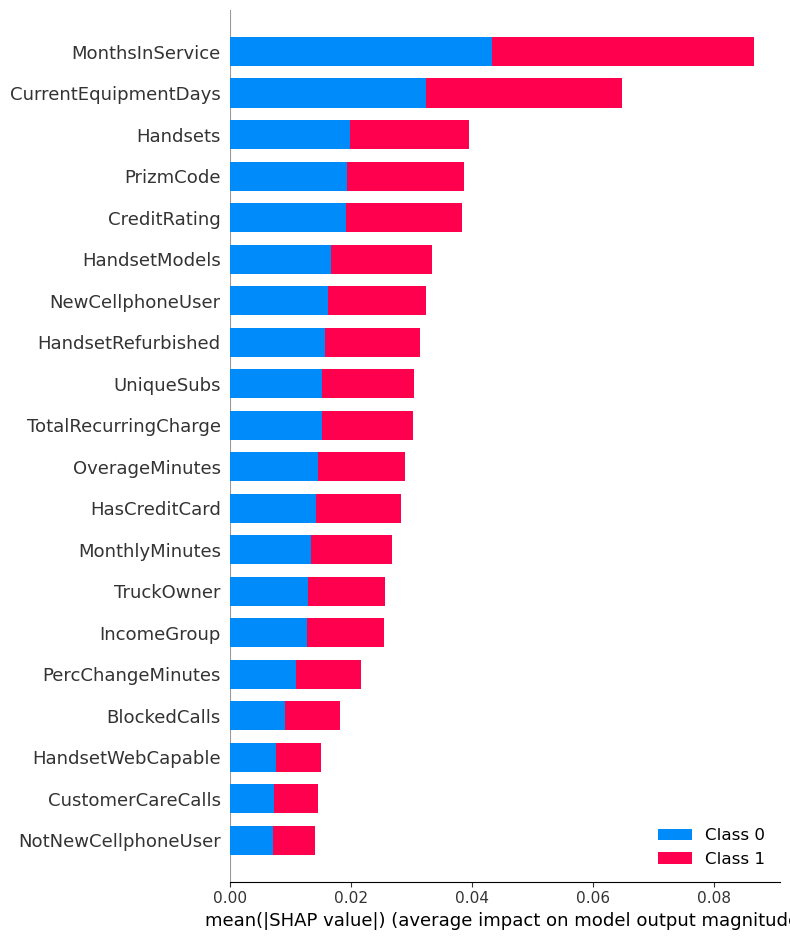

In [81]:
import shap

# SHAP Explainer 생성
explainer_1 = shap.TreeExplainer(model_1)

# 테스트 데이터에 대한 SHAP 값 계산
shap_values_1 = explainer_1.shap_values(X_test)

# SHAP summary plot (큰 변수들의 SHAP 값 시각화)
shap.summary_plot(shap_values_1, X_test)

In [82]:
# 특정 관측치에 대한 SHAP Force Plot
shap.initjs()
shap.force_plot(explainer_1.expected_value[1], shap_values_1[1][0, :], X_test.iloc[0, :])

findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Fo

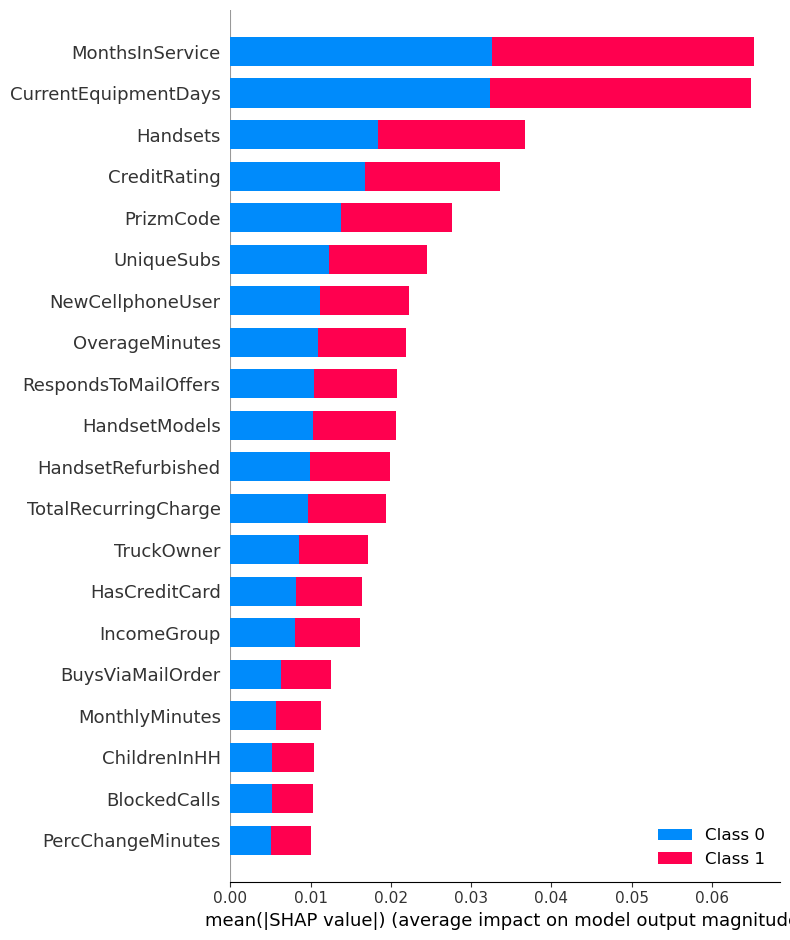

In [57]:
import shap 

# 모델 2에 대한 SHAP Explainer 생성
explainer_2 = shap.TreeExplainer(model_2)

# 테스트 데이터에 대한 SHAP 값 계산
shap_values_2 = explainer_2.shap_values(X_test)
shap_obj = explainer_2(X_test)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Un

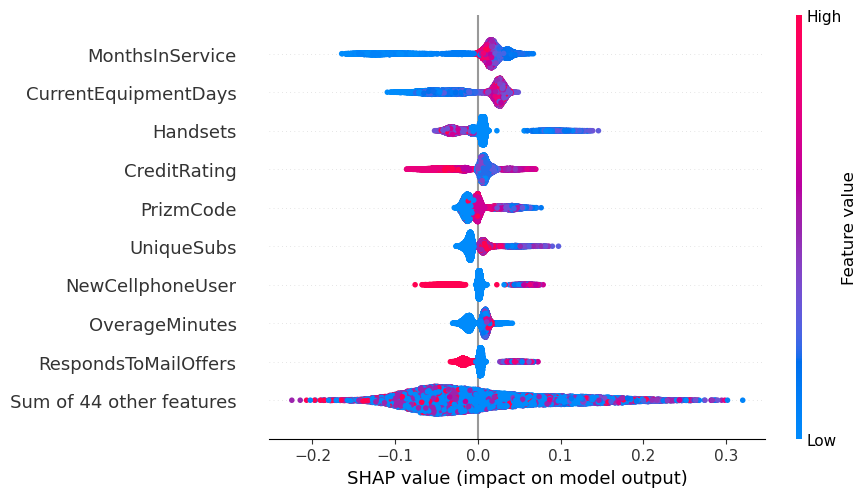

In [78]:
shap.plots.beeswarm(shap_obj[:,:,1])



In [84]:
# 특정 관측치에 대한 SHAP Force Plot
shap.initjs()
shap.force_plot(explainer_2.expected_value[1], shap_values_2[1][0, :], X_test.iloc[0, :])


findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Fo

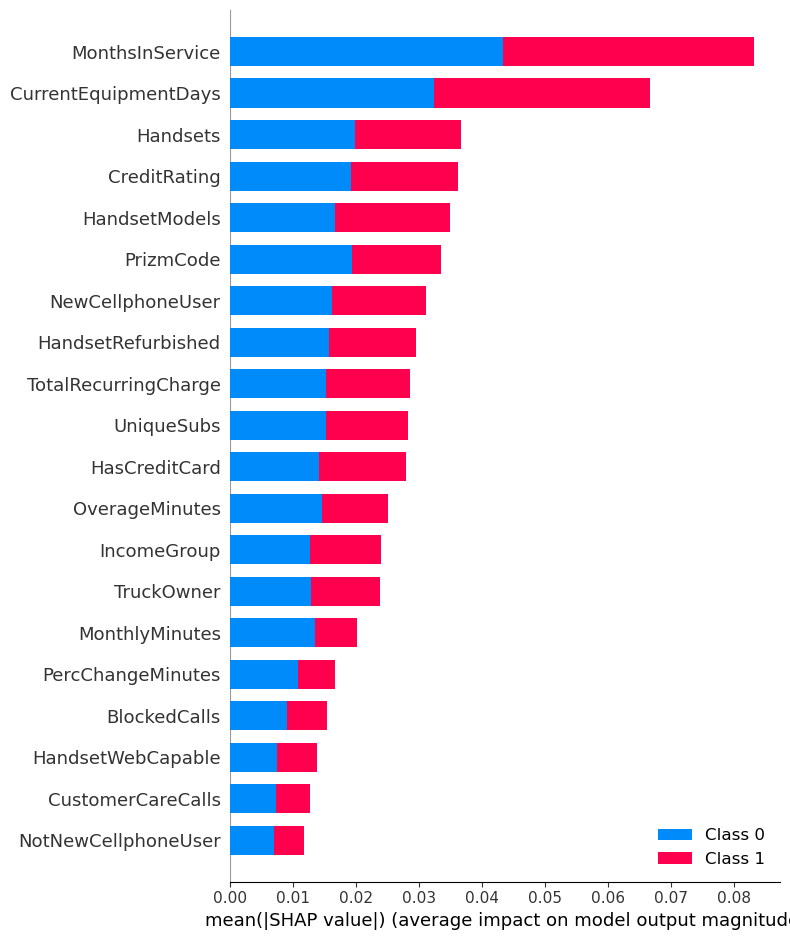

In [85]:
# 두 모델의 SHAP 값 비교
shap.summary_plot([shap_values_1[1], shap_values_2[1]], X_test, feature_names=X_test.columns)


In [130]:
rf_result_df

,Model,Accuracy,Precision,Recall,F1-Score,Dataset
0,Hyperparameters1,0.782565,0.845718,0.692337,0.761380,Test
1,Hyperparameters1,0.890358,0.930665,0.843351,0.884859,Train
2,Hyperparameters2,0.758912,0.785566,0.713623,0.747868,Test
3,Hyperparameters2,0.796461,0.817659,0.762627,0.789185,Train


In [127]:
import plotly.graph_objects as go

# 모델 이름
model_names = ['Hyperparameters1', 'Hyperparameters2']


test_accuracy = rf_result_df.loc[rf_result_df['Dataset']=='Test']['Accuracy'].values
train_accuracy = rf_result_df.loc[rf_result_df['Dataset']=='Train']['Accuracy'].values
test_f1_score = rf_result_df.loc[rf_result_df['Dataset']=='Test']['F1-Score'].values
train_f1_score = rf_result_df.loc[rf_result_df['Dataset']=='Train']['F1-Score'].values

# TEST와 TRAIN의 정확도 및 F1-Score 차이 계산
accuracy_difference = [test_acc - train_acc for test_acc, train_acc in zip(test_accuracy, train_accuracy)]
f1_score_difference = [test_f1 - train_f1 for test_f1, train_f1 in zip(test_f1_score, train_f1_score)]

# figure 생성
fig = go.Figure()

# TEST 및 TRAIN 정확도 및 F1-Score 그래프 추가
fig.add_trace(go.Bar(x=model_names, y=test_accuracy, name='Test Accuracy', marker_color='blue'))
fig.add_trace(go.Bar(x=model_names, y=train_accuracy, name='Train Accuracy', marker_color='orange'))
fig.add_trace(go.Bar(x=model_names, y=test_f1_score, name='Test F1-Score', marker_color='green'))
fig.add_trace(go.Bar(x=model_names, y=train_f1_score, name='Train F1-Score', marker_color='red'))

# TEST와 TRAIN의 정확도 및 F1-Score 차이 그래프 추가
fig.add_trace(go.Bar(x=model_names, y=accuracy_difference, name='Accuracy Difference', marker_color='lightblue'))
fig.add_trace(go.Bar(x=model_names, y=f1_score_difference, name='F1-Score Difference', marker_color='lightcoral'))

# 그래프 레이아웃 설정
fig.update_layout(
    title='TEST vs. TRAIN 성능 및 차이',
    xaxis=dict(title='모델'),
    yaxis=dict(title='성능'),
    barmode='group'
)

# 그래프 출력
fig.show()


In [128]:
import plotly.graph_objects as go

# 하이퍼파라미터 및 성능 데이터 생성 (임의의 데이터 사용)
hyperparameters = ['Parameter 1', 'Parameter 2']


# TRAIN 및 TEST 성능 차이 계산
performance_difference = [train_acc - test_acc for train_acc, test_acc in zip(train_accuracy, test_accuracy)]

# 데이터프레임 생성
data = pd.DataFrame({'Hyperparameters': hyperparameters, 'Train Accuracy': train_accuracy, 'Test Accuracy': test_accuracy, 'Performance Difference': performance_difference})

# 그래프 생성
fig = go.Figure(data=[
    go.Bar(name='Train Accuracy', x=hyperparameters, y=train_accuracy),
    go.Bar(name='Test Accuracy', x=hyperparameters, y=test_accuracy),
    go.Scatter(name='Performance Difference', x=hyperparameters, y=performance_difference, yaxis='y2', mode='lines+markers')
])

# 그래프 레이아웃 설정
fig.update_layout(title='TRAIN 및 TEST 성능 및 차이', xaxis_title='Hyperparameters', yaxis_title='Accuracy', yaxis2=dict(title='Difference', overlaying='y', side='right'))

# 그래프 출력
fig.show()


In [129]:
import plotly.graph_objects as go

# TRAIN 및 TEST 성능 차이 계산
performance_difference = [train_f1 - test_f1 for train_f1, test_f1 in zip(train_f1_score, test_f1_score)]

# 데이터프레임 생성
data = pd.DataFrame({'Hyperparameters': hyperparameters, 'Train F1-Score': train_accuracy, 'Test F1-Score': test_accuracy, 'Performance Difference': performance_difference})

# 그래프 생성
fig = go.Figure(data=[
    go.Bar(name='Train F1-Score', x=hyperparameters, y=train_accuracy),
    go.Bar(name='Test F1-Score', x=hyperparameters, y=test_accuracy),
    go.Scatter(name='Performance Difference', x=hyperparameters, y=performance_difference, yaxis='y2', mode='lines+markers')
])

# 그래프 레이아웃 설정
fig.update_layout(title='TRAIN 및 TEST 성능 및 차이', xaxis_title='Hyperparameters', yaxis_title='F1-Score', yaxis2=dict(title='Difference', overlaying='y', side='right'))

# 그래프 출력
fig.show()

###  마케팅 

* 이탈 고객의 절반 이상이 신용 등급이 높다.(high, highest)
* 이탈 고객과 미이탈 고객의 서비스 이용 기간을 비율로 나타냈을 때, 이탈 고객의 이용 기간은 11개월이 10.9%로 가장 많았고 12개월은 7.5%, 13개월은 6.1%를 차지한다.
* 미이탈 고객의 서비스 이용 기간은 7개월이 6.6%로 가장 많았다.

-------------

신용 등급이 높은 이탈 고객을 타겟팅: 신용 등급이 높은 이탈 고객을 대상으로 추가 혜택을 제공하여 이탈을 줄이고 고객을 유지할 수 있습니다. 예를 들어, 신용 등급이 높은 고객에게는 프리미엄 서비스, 할인 혜택, 또는 특별한 혜택을 제공할 수 있습니다.

이탈 고객을 위한 재유치 프로그램: 이탈한 고객을 다시 찾아오게끔 하는 프로그램을 개발합니다. 기존 고객들에게 할인, 적립금, 무료 업그레이드, 또는 다른 유형의 인센티브를 제공하여 이탈한 고객을 재이용하도록 유도할 수 있습니다.

11개월, 12개월, 13개월 이용 기간을 고려한 할인 프로모션: 이탈 고객 중 11개월, 12개월, 13개월 이용 기간을 가진 고객들을 대상으로 할인 프로모션을 진행합니다. 이를 통해 이탈을 방지하고 이용 기간을 연장할 수 있습니다.

미이탈 고객의 이탈 방지: 서비스 이용 기간이 7개월인 미이탈 고객을 대상으로 이탈 방지 프로그램을 개발합니다. 이탈 위험이 있는 고객에게 개별적인 접근을 통해 이탈을 방지하는 조치를 취할 수 있습니다.

findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Fo

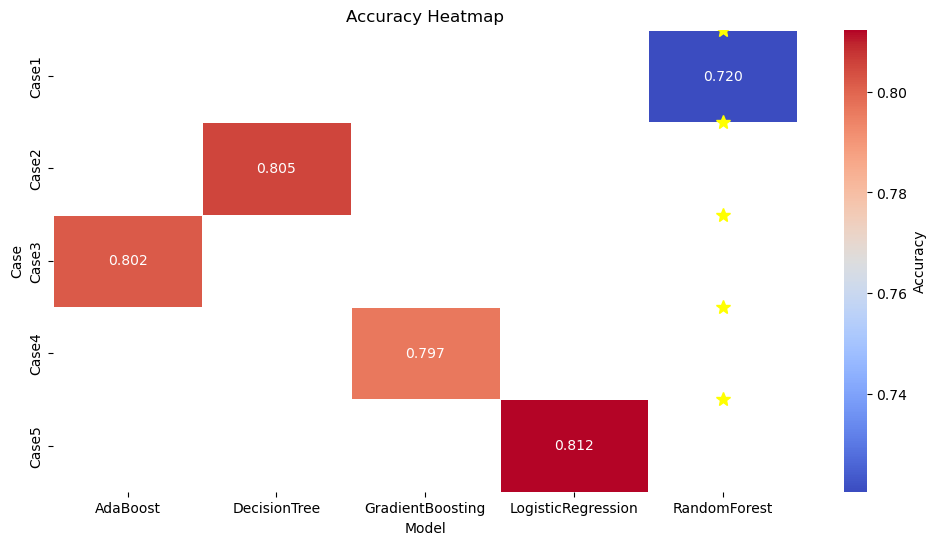

findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Fo

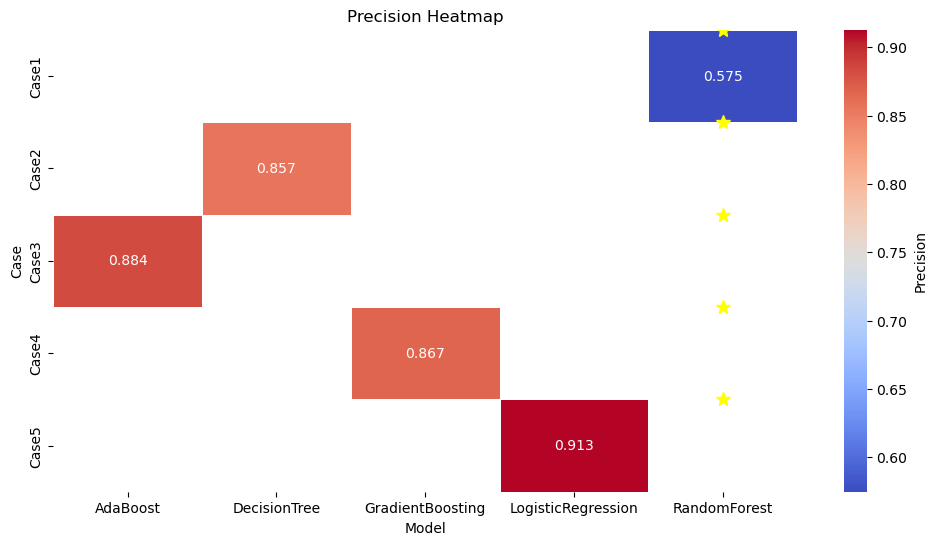

findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Fo

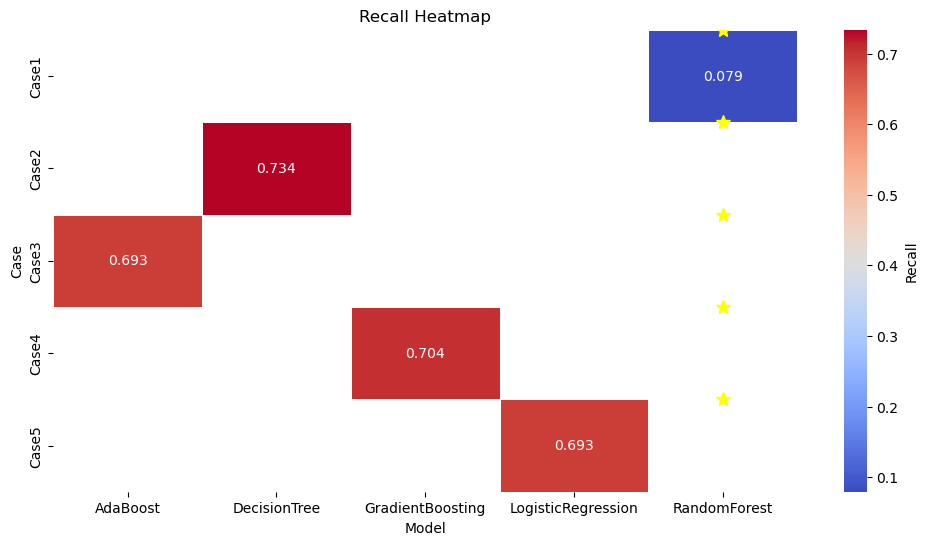

findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Fo

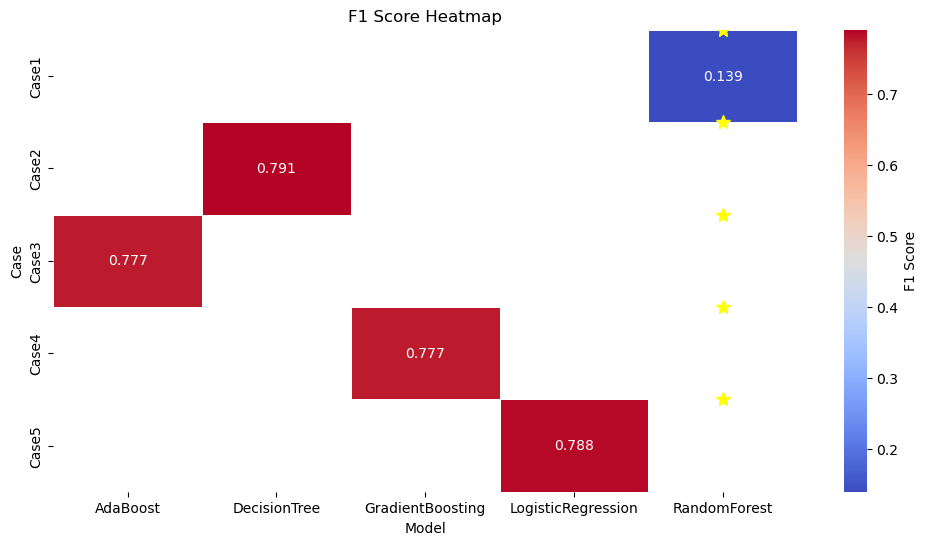

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def create_heatmap(data, metric):
    # 데이터를 DataFrame으로 변환
    df = pd.DataFrame(data)

    # 히트맵을 생성합니다.
    plt.figure(figsize=(12, 6))
    heatmap_data = df.pivot("Case", "Model", metric)
    
    # 히트맵 생성
    sns.heatmap(heatmap_data, annot=True, fmt=".3f", cmap="coolwarm", linewidths=0.5, cbar=True, cbar_kws={'label': metric})
    
    # 별 모양의 선을 추가합니다.
    for i in range(len(df["Case"])):
        plt.plot([-0.5, len(df["Model"]) - 0.5], [i, i], marker="*", color="yellow", markersize=10, linestyle="")
    
    # 히트맵에 라벨과 제목을 추가합니다.
    plt.xlabel("Model")
    plt.ylabel("Case")
    plt.title(f"{metric} Heatmap")
    
    # 히트맵을 표시합니다.
    plt.show()

# 성능 데이터
data = {
    'Case': ['Case1', 'Case2', 'Case3', 'Case4', 'Case5'],
    'Model': ['RandomForest', 'DecisionTree', 'AdaBoost', 'GradientBoosting', 'LogisticRegression'],
    'Accuracy': [0.720488, 0.805312, 0.801831, 0.796547, 0.812364],
    'Precision': [0.574830, 0.857328, 0.883545, 0.867217, 0.912789],
    'Recall': [0.079343, 0.733845, 0.692755, 0.704124, 0.692758],
    'F1 Score': [0.139439, 0.790795, 0.776604, 0.777207, 0.787697]
}

# 원하는 지표에 대한 히트맵 생성
create_heatmap(data, "Accuracy")
create_heatmap(data, "Precision")
create_heatmap(data, "Recall")
create_heatmap(data, "F1 Score")


findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Fo

findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Fo

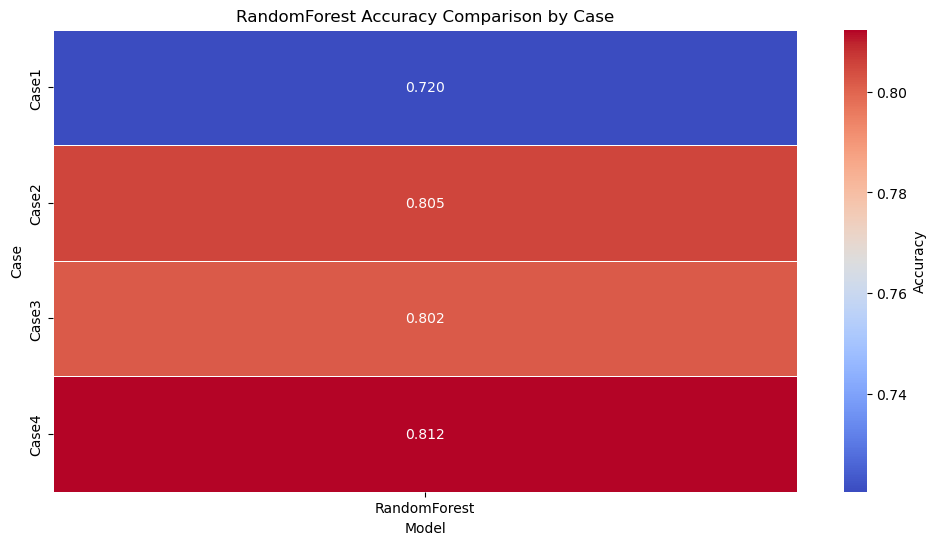

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 성능 데이터
data = {
    'Case': ['Case1', 'Case2', 'Case3', 'Case4'],
    'Model': ['RandomForest', 'RandomForest', 'RandomForest', 'RandomForest'],
    'Metric': ['Accuracy', 'Accuracy', 'Accuracy', 'Accuracy'],
    'Value': [0.720488, 0.805312, 0.801831, 0.812364]
}

df = pd.DataFrame(data)

# 히트맵을 생성합니다.
plt.figure(figsize=(12, 6))
heatmap_data = df.pivot("Case", "Model", "Value")
sns.heatmap(heatmap_data, annot=True, fmt=".3f", cmap="coolwarm", linewidths=0.5, cbar=True, cbar_kws={'label': 'Accuracy'})

# 히트맵에 라벨과 제목을 추가합니다.
plt.xlabel("Model")
plt.ylabel("Case")
plt.title("RandomForest Accuracy Comparison by Case")

# 히트맵을 표시합니다.
plt.show()


findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.


findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Fo

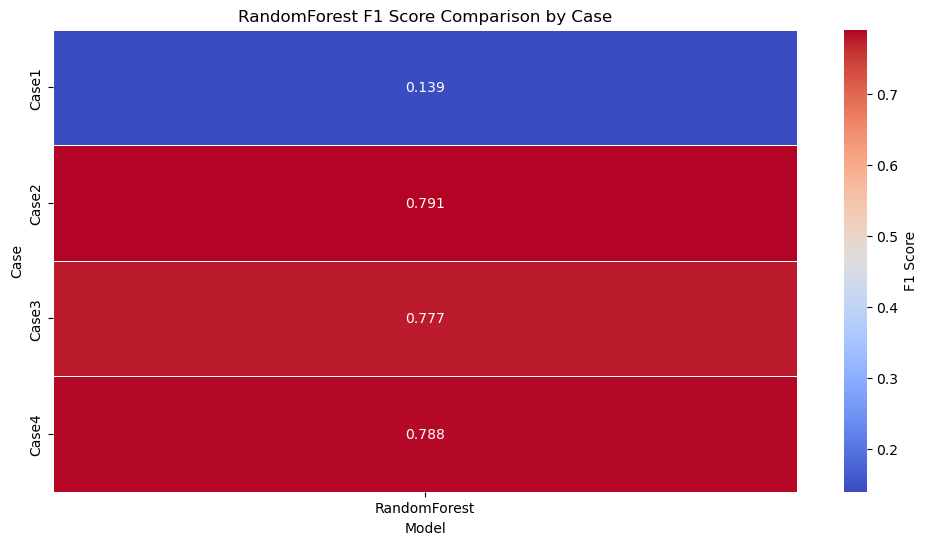

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 성능 데이터 (F1 Score로 변경)
data = {
    'Case': ['Case1', 'Case2', 'Case3', 'Case4'],
    'Model': ['RandomForest', 'RandomForest', 'RandomForest', 'RandomForest'],
    'Metric': ['F1 Score', 'F1 Score', 'F1 Score', 'F1 Score'],
    'Value': [0.139439, 0.790795, 0.776604, 0.787697]
}

df = pd.DataFrame(data)

# 히트맵을 생성합니다.
plt.figure(figsize=(12, 6))
heatmap_data = df.pivot("Case", "Model", "Value")
sns.heatmap(heatmap_data, annot=True, fmt=".3f", cmap="coolwarm", linewidths=0.5, cbar=True, cbar_kws={'label': 'F1 Score'})

# 히트맵에 라벨과 제목을 추가합니다.
plt.xlabel("Model")
plt.ylabel("Case")
plt.title("RandomForest F1 Score Comparison by Case")

# 히트맵을 표시합니다.
plt.show()


findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Fo

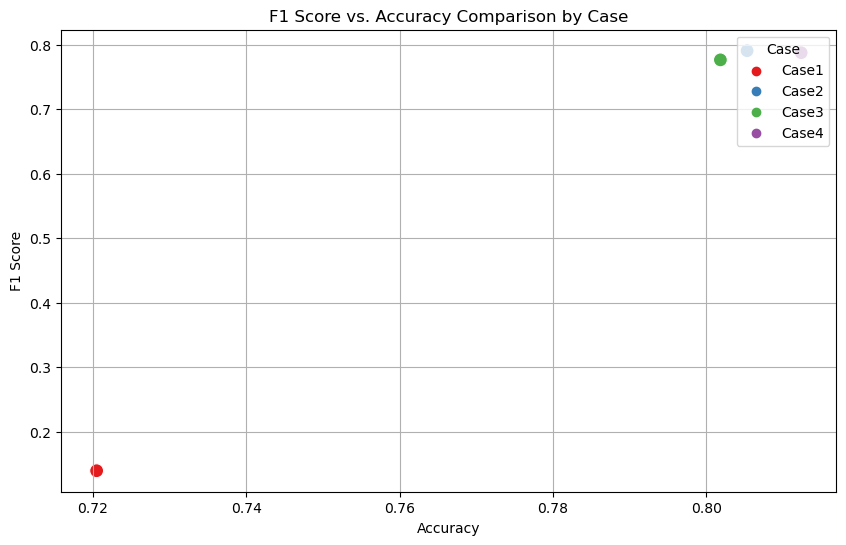

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 데이터를 딕셔너리 형태로 정의
data = {
    'Case': ['Case1', 'Case2', 'Case3', 'Case4'],
    'Model': ['RandomForest', 'RandomForest', 'RandomForest', 'RandomForest'],
    'Accuracy': [0.720488, 0.805312, 0.801831, 0.812364],
    'F1 Score': [0.139439, 0.790795, 0.776604, 0.787697]
}

df = pd.DataFrame(data)

# Scatter plot 그리기
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Accuracy', y='F1 Score', hue='Case', palette='Set1', s=100)

# 라벨과 제목 추가
plt.xlabel("Accuracy")
plt.ylabel("F1 Score")
plt.title("F1 Score vs. Accuracy Comparison by Case")

# 범례 추가
plt.legend(title='Case', loc='upper right')

# 산점도 표시
plt.grid(True)
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.


findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Fo

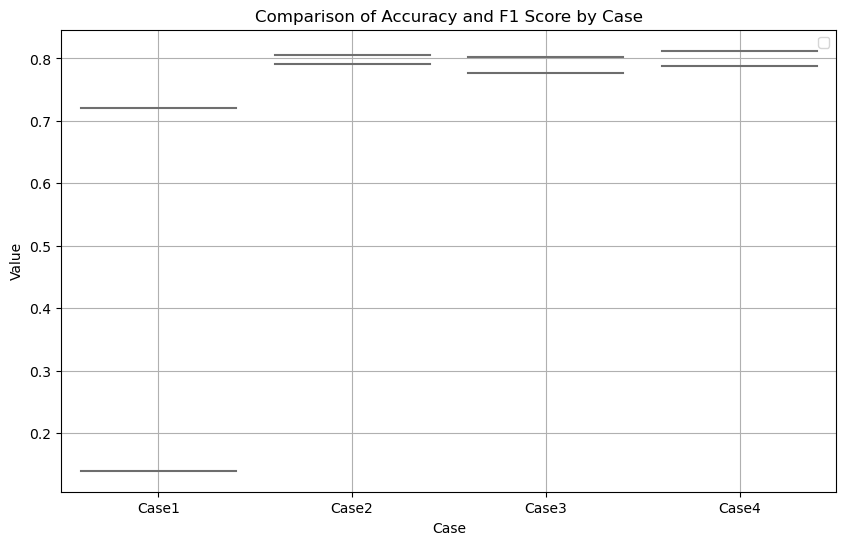

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 데이터를 딕셔너리 형태로 정의
data = {
    'Case': ['Case1', 'Case2', 'Case3', 'Case4'],
    'Model': ['RandomForest', 'RandomForest', 'RandomForest', 'RandomForest'],
    'Accuracy': [0.720488, 0.805312, 0.801831, 0.812364],
    'F1 Score': [0.139439, 0.790795, 0.776604, 0.787697]
}

df = pd.DataFrame(data)

# 바이올린 플롯 그리기
plt.figure(figsize=(10, 6))

# Accuracy에 대한 바이올린 플롯 (파란색)
sns.violinplot(data=df, x='Case', y='Accuracy', color='skyblue', inner=None, label='Accuracy')

# F1 Score에 대한 바이올린 플롯 (빨간색)
sns.violinplot(data=df, x='Case', y='F1 Score', color='salmon', inner=None, label='F1 Score')

# 라벨과 제목 추가
plt.xlabel("Case")
plt.ylabel("Value")
plt.title("Comparison of Accuracy and F1 Score by Case")

# 범례 추가
plt.legend()

# 바이올린 플롯 표시
plt.grid(True)
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: F

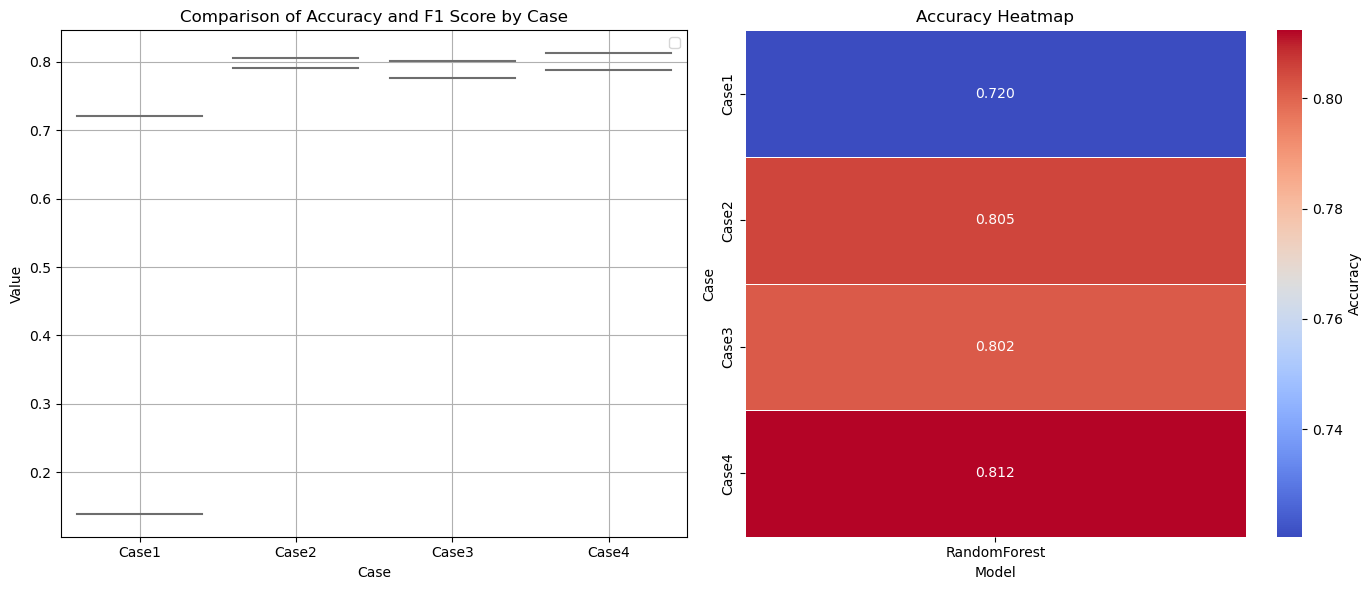

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 데이터를 딕셔너리 형태로 정의
data = {
    'Case': ['Case1', 'Case2', 'Case3', 'Case4'],
    'Model': ['RandomForest', 'RandomForest', 'RandomForest', 'RandomForest'],
    'Accuracy': [0.720488, 0.805312, 0.801831, 0.812364],
    'F1 Score': [0.139439, 0.790795, 0.776604, 0.787697]
}

df = pd.DataFrame(data)

# 바이올린 플롯과 히트맵 그리기
plt.figure(figsize=(14, 6))

# 바이올린 플롯 그리기 (왼쪽)
plt.subplot(1, 2, 1)
sns.violinplot(data=df, x='Case', y='Accuracy', palette=["skyblue"], inner=None, label='Accuracy')
sns.violinplot(data=df, x='Case', y='F1 Score', palette=["salmon"], inner=None, label='F1 Score')

plt.xlabel("Case")
plt.ylabel("Value")
plt.title("Comparison of Accuracy and F1 Score by Case")
plt.legend()
plt.grid(True)

# 히트맵 그리기 (오른쪽)
plt.subplot(1, 2, 2)
heatmap_data = df.pivot("Case", "Model", "Accuracy")
sns.heatmap(heatmap_data, annot=True, fmt=".3f", cmap="coolwarm", linewidths=0.5, cbar=True, cbar_kws={'label': 'Accuracy'})
plt.xlabel("Model")
plt.ylabel("Case")
plt.title("Accuracy Heatmap")

plt.tight_layout()
plt.show()


findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Fo

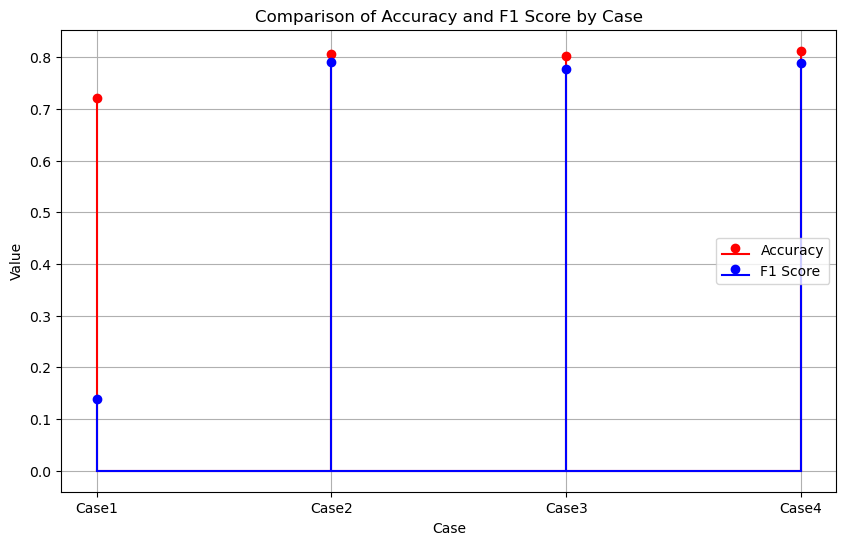

In [112]:
import matplotlib.pyplot as plt
import numpy as np

# 데이터 정의
cases = ['Case1', 'Case2', 'Case3', 'Case4']
accuracy = [0.720488, 0.805312, 0.801831, 0.812364]
f1_score = [0.139439, 0.790795, 0.776604, 0.787697]

# 그래프 크기 설정
plt.figure(figsize=(10, 6))

# Accuracy Lollipop Chart 그리기
plt.stem(cases, accuracy, markerfmt='ro', linefmt='r-', basefmt='r-', label='Accuracy')

# F1 Score Lollipop Chart 그리기
plt.stem(cases, f1_score, markerfmt='bo', linefmt='b-', basefmt='b-', label='F1 Score')

# 라벨과 제목 추가
plt.xlabel("Case")
plt.ylabel("Value")
plt.title("Comparison of Accuracy and F1 Score by Case")

# 범례 추가
plt.legend()

# 그래프 표시
plt.grid(True)
plt.show()


findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Fo

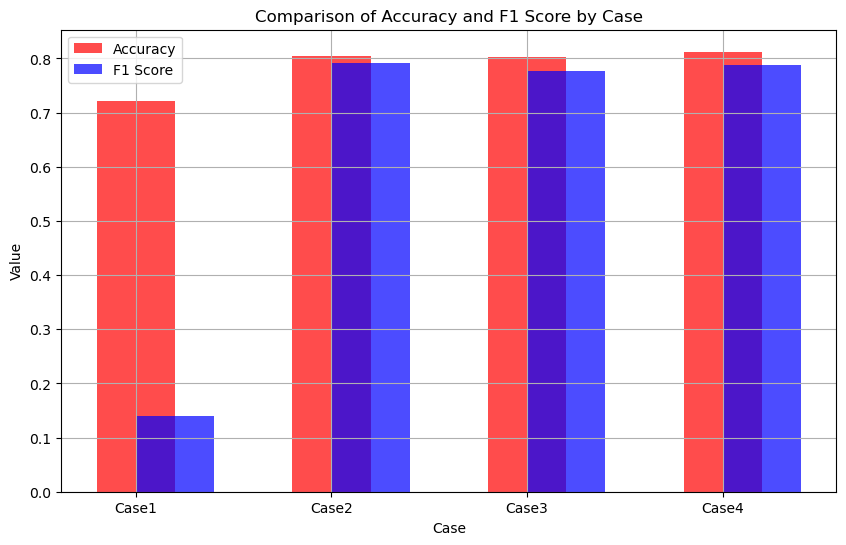

In [122]:
import matplotlib.pyplot as plt

# 데이터 정의
cases = ['Case1', 'Case2', 'Case3', 'Case4']
accuracy = [0.720488, 0.805312, 0.801831, 0.812364]
f1_score = [0.139439, 0.790795, 0.776604, 0.787697]

# 그래프 크기 설정
plt.figure(figsize=(10, 6))

# Case를 x축으로 하고 Accuracy와 F1 Score를 막대 그래프로 그리기
plt.bar(cases, accuracy, width=0.4, align='center', label='Accuracy', color='r', alpha=0.7)
plt.bar(cases, f1_score, width=0.4, align='edge', label='F1 Score', color='b', alpha=0.7)

# 라벨과 제목 추가
plt.xlabel("Case")
plt.ylabel("Value")
plt.title("Comparison of Accuracy and F1 Score by Case")

# 범례 추가
plt.legend()

# 그래프 표시
plt.grid(True)
plt.show()


findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.


findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Fo

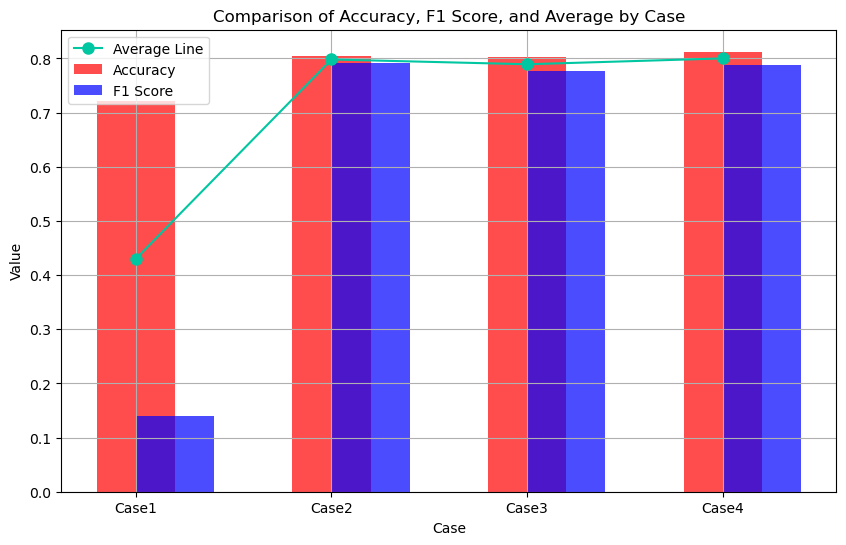

In [125]:
import matplotlib.pyplot as plt
import numpy as np

# 데이터 정의
cases = ['Case1', 'Case2', 'Case3', 'Case4']
accuracy = [0.720488, 0.805312, 0.801831, 0.812364]
f1_score = [0.139439, 0.790795, 0.776604, 0.787697]

# Accuracy와 F1 Score를 합친 후 평균 계산
average_value = [(a + f) / 2 for a, f in zip(accuracy, f1_score)]

# 그래프 크기 설정
plt.figure(figsize=(10, 6))

# Case를 x축으로 하고 Accuracy와 F1 Score를 막대 그래프로 그리기
plt.bar(cases, accuracy, width=0.4, align='center', label='Accuracy', color='r', alpha=0.7)
plt.bar(cases, f1_score, width=0.4, align='edge', label='F1 Score', color='b', alpha=0.7)

# # Accuracy와 F1 Score에 라인 추가
# plt.plot(cases, accuracy, marker='o', linestyle='-', color='r', label='Accuracy Line', markersize=8)
# plt.plot(cases, f1_score, marker='o', linestyle='-', color='b', label='F1 Score Line', markersize=8)

# 합친 평균 값에 대한 라인 추가 (녹색)
plt.plot(cases, average_value, marker='o', linestyle='-', color='#00C7A1', label='Average Line', markersize=8)

# 라벨과 제목 추가
plt.xlabel("Case")
plt.ylabel("Value")
plt.title("Comparison of Accuracy, F1 Score, and Average by Case")

# 범례 추가
plt.legend()

# 그래프 표시
plt.grid(True)
plt.show()


In [126]:
import numpy as np

# 모델별 F1 Score와 Accuracy 데이터 정의 (예시 데이터)
model_data = {
    'RandomForest': {'F1 Score': [0.139439, 0.790795, 0.776604, 0.787697], 'Accuracy': [0.720488, 0.805312, 0.801831, 0.812364]},
    'DecisionTree': {'F1 Score': [0.34008, 0.695026, 0.709912, 0.722048], 'Accuracy': [0.614096, 0.693598, 0.708742, 0.718711]},
    'AdaBoost': {'F1 Score': [0.0164253, 0.701295, 0.733576, 0.721645], 'Accuracy': [0.717741, 0.707041, 0.744495, 0.741864]},
    'GradientBoosting': {'F1 Score': [0.108269, 0.753349, 0.755820, 0.754692], 'Accuracy': [0.719684, 0.784916, 0.787334, 0.791014]},
    'LogisticRegression': {'F1 Score': [0.010633, 0.592782, 0.691850, 0.604246], 'Accuracy': [0.713252, 0.586798, 0.703455, 0.582324]}
}

# 각 모델별 F1 Score와 Accuracy의 평균 계산
average_f1_scores = {}
average_accuracies = {}

for model, scores in model_data.items():
    average_f1_scores[model] = np.mean(scores['F1 Score'])
    average_accuracies[model] = np.mean(scores['Accuracy'])

# 평균 F1 Score와 Accuracy가 가장 높은 모델 찾기
best_model = max(average_f1_scores, key=average_f1_scores.get)
worst_model = min(average_f1_scores, key=average_f1_scores.get)

# 결과 출력
print(f"가장 좋은 모델 (평균 F1 Score): {best_model} (F1 Score: {average_f1_scores[best_model]:.4f}, Accuracy: {average_accuracies[best_model]:.4f})")
print(f"가장 나쁜 모델 (평균 F1 Score): {worst_model} (F1 Score: {average_f1_scores[worst_model]:.4f}, Accuracy: {average_accuracies[worst_model]:.4f})")


가장 좋은 모델 (평균 F1 Score): RandomForest (F1 Score: 0.6236, Accuracy: 0.7850)
가장 나쁜 모델 (평균 F1 Score): LogisticRegression (F1 Score: 0.4749, Accuracy: 0.6465)
